In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import tensorflow as tf

In [22]:
# Loading in the classifier model
imageclassifier = load_model('imageclassifier.h5')

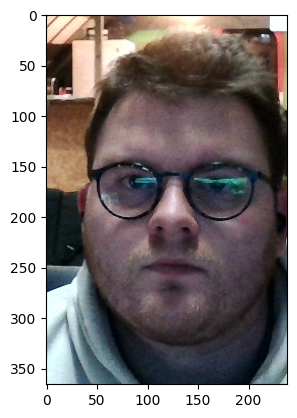

In [23]:
# Choose the test image (2 options: input from camera in facedetector or self chosen test images)
# Read in image
img = cv2.imread('../FaceDetector/input_image/input_image.jpg')
# img = cv2.imread('./test_images/emiel_cam.jpg')

# Convert colors
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot image
plt.imshow(im_rgb)
plt.show()

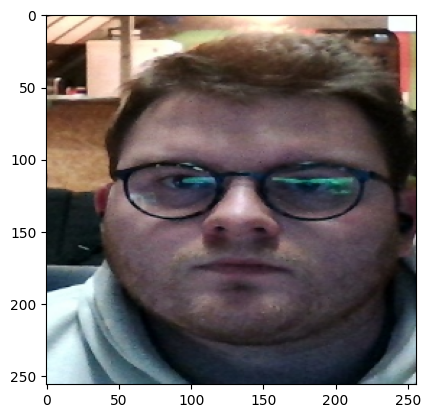

In [24]:
# Resize image to 256, 256
resize = tf.image.resize(im_rgb, (256,256))

# Plot image again
plt.imshow(resize.numpy().astype(int))
plt.show()

In [25]:
# Do prediction via model
yhat = imageclassifier.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 837ms/step


In [26]:
# Check score
yhat[0][0]

0.99999565

In [27]:
# Decide wether face is member or intruder
# Because we are opening a door, we take a higher value
if yhat > 0.80: 
    print(f'Predicted class is member')
else:
    print(f'Predicted class is intruder')

Predicted class is member


In [28]:
# This is the point to send a signal to the raspberry pi led board